## Convolutional Neural Network

by Rina Buoy, PhD

1. Model Definition: A simple CNN with two convolutional layers, pooling, and fully connected layers.

2. Filter Visualization: Displays the filters of the first convolutional layer.

3. Activation Visualization: Displays activations of the first convolutional layer for a sample image batch.

### Import Packages

In [5]:
!pip install thop

In [6]:
!pip install torchsummary


  Obtaining dependency information for torchsummary from https://files.pythonhosted.org/packages/7d/18/1474d06f721b86e6a9b9d7392ad68bed711a02f3b61ac43f13c719db50a6/torchsummary-1.5.1-py3-none-any.whl.metadata


In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


### Data Loading 

In [2]:

# Step 1: Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:15<00:00, 651933.15it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 107383.99it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:02<00:00, 602425.37it/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2250505.47it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



### Model Architecture 

In [3]:


# Step 2: Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

### Model Training

In [4]:


# Step 3: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")

train_model(model, train_loader, criterion, optimizer)

Epoch 1/5, Loss: 0.1870
Epoch 2/5, Loss: 0.0534
Epoch 3/5, Loss: 0.0373
Epoch 4/5, Loss: 0.0274
Epoch 5/5, Loss: 0.0218


### Model Visualization

Filters from the first convolutional layer:


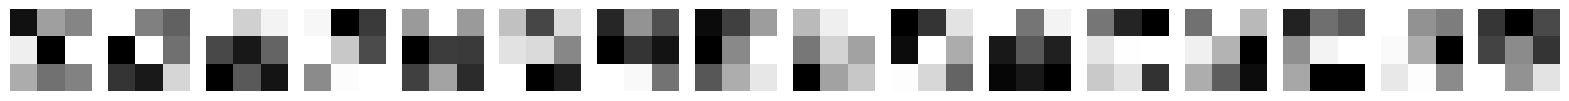

In [7]:


# Step 5: Visualize filters from the first convolutional layer
def visualize_filters(layer):
    filters = layer.weight.data.cpu().numpy()
    num_filters = filters.shape[0]
    fig, axes = plt.subplots(1, num_filters, figsize=(20, 5))
    for i, ax in enumerate(axes):
        ax.imshow(filters[i, 0, :, :], cmap='gray')
        ax.axis('off')
    plt.show()

print("Filters from the first convolutional layer:")
visualize_filters(model.conv1)


Activations from the first convolutional layer:


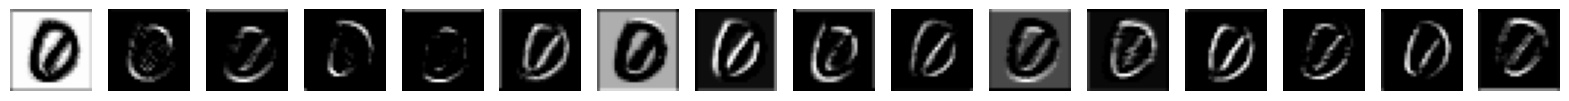

In [8]:

# Step 6: Visualize activations from the first convolutional layer
def visualize_activations(model, images):
    model.eval()
    with torch.no_grad():
        activations = model.relu(model.conv1(images.to(device))).cpu()
    num_activations = activations.shape[1]
    fig, axes = plt.subplots(1, num_activations, figsize=(20, 5))
    for i, ax in enumerate(axes):
        ax.imshow(activations[0, i, :, :].numpy(), cmap='gray')
        ax.axis('off')
    plt.show()

# Get a batch of images
images, _ = next(iter(train_loader))

print("Activations from the first convolutional layer:")
visualize_activations(model, images)

### Model Complexity

In [ ]:
# Step 7: Count parameters in each layer
def count_parameters(model):
    print("\nParameter count per layer:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}: {param.numel()} parameters")

count_parameters(model)

# Step 8: Estimate FLOPs for each layer
def estimate_flops(model, input_size=(1, 1, 28, 28)):
    from thop import profile
    dummy_input = torch.randn(*input_size).to(device)
    macs, params = profile(model, inputs=(dummy_input,), verbose=False)
    print(f"\nTotal FLOPs (MACs): {macs}")

estimate_flops(model)


Parameter count per layer:
conv1.weight: 144 parameters
conv1.bias: 16 parameters
conv2.weight: 4608 parameters
conv2.bias: 32 parameters
fc1.weight: 200704 parameters
fc1.bias: 128 parameters
fc2.weight: 1280 parameters
fc2.bias: 10 parameters

Total FLOPs (MACs): 1218048.0


### Model Summary

In [10]:
from torchsummary import summary

# Display the summary of the model
print("Model Summary:")
summary(model, input_size=(1, 28, 28))


Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           4,640
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6             [-1, 32, 7, 7]               0
            Linear-7                  [-1, 128]         200,832
              ReLU-8                  [-1, 128]               0
            Linear-9                   [-1, 10]           1,290
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.33
Params size (MB): 0.79
Estimated Total Size (MB): 1.12
----------------------------

### Model Deployment

In [16]:
import gradio as gr
# Step 9: Deploy the model using Gradio
def predict_image(image):
    model.eval()
    with torch.no_grad():
        image = transform(image.convert('L').resize((28,28))).unsqueeze(0).to(device)
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return f"Predicted Digit: {predicted.item()}"

# Define Gradio interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(label="Input Image",type="pil"),
    outputs="text",
    live=False,
    title="MNIST Digit Classifier",
    description="Upload a grayscale image of a handwritten digit (28x28 pixels) to classify it."
)

# Launch the Gradio interface
interface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.36.0, however version 4.44.1 is available, please upgrade.
--------
